In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
#loading the data
df = pd.read_csv("C:\\Users\\KCR\\Downloads\\twitter-airline-sentiment\\Tweets.csv",encoding= 'utf-8')

In [4]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [5]:
#checking the nulls
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
#ropping the unnecessary columns
df.drop(['tweet_id','airline_sentiment_gold','negativereason_gold','tweet_coord','name'],axis = 1,inplace =True)

In [8]:
df.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'retweet_count', 'text',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [9]:
df.shape

(14640, 10)

In [10]:
(df['airline_sentiment'] =='negative').sum()

9178

In [12]:
#filling the null values 
df['negativereason_confidence'].isnull().sum()
df['negativereason_confidence'].fillna(0,inplace = True)

In [13]:
df['airline_sentiment_confidence'].isnull().sum()

0

In [20]:
(df[df['airline'] == 'American']['airline_sentiment'] == 'negative').sum()

1960

In [21]:
(df[df['airline'] == 'United']['airline_sentiment'] == 'negative').sum()

2633

In [22]:
(df[df['airline'] == 'US Airways']['airline_sentiment'] == 'negative').sum()

2263

In [23]:
(df[df['airline'] == 'Delta']['airline_sentiment'] == 'negative').sum()

955

In [24]:
(df[df['airline'] == 'Virgin America']['airline_sentiment'] == 'negative').sum()

181

In [110]:
a = df['airline'].unique()
index = [1,2,3]

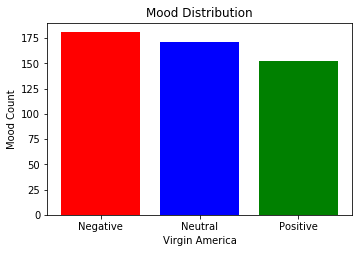

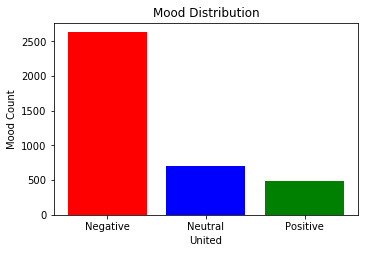

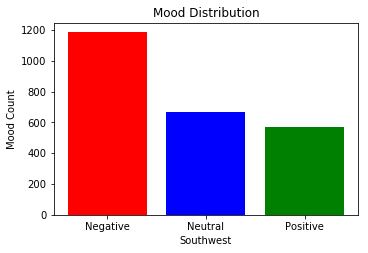

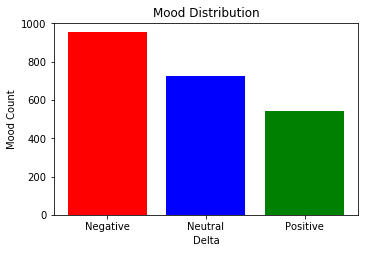

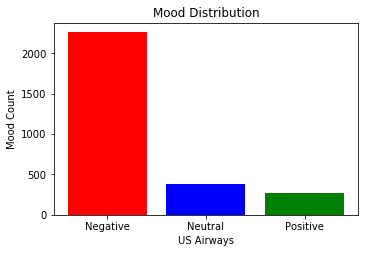

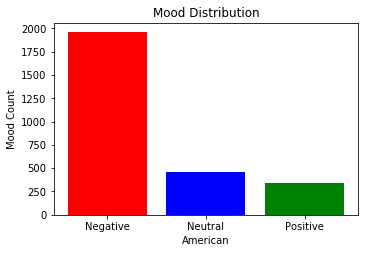

In [112]:
#visualization
for i in range(6):
    plt.figure(1,figsize=(12,12))

    plt.subplot(3,2,i+1)
    plt.bar(index,df[df['airline'] == a[i]]['airline_sentiment'].value_counts(),color=['r','b','g'])
    plt.xticks(index,['Negative','Neutral','Positive'])
    plt.xlabel(a[i])
    plt.ylabel('Mood Count')
    plt.title('Mood Distribution')
    plt.show()


In [27]:
#filling null values
df['negativereason'].fillna(0,inplace=True)

In [28]:
df.shape[0]

14640

In [29]:
#encoding the column
for i in range(df.shape[0]):
    if(df['negativereason'][i] != 0):
        df['negativereason'][i] = 1


C:\Users\KCR\Anaconda3\envs\tfdeeplearning_1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
a = df[df['airline']  == 'Virgin America']['text']
a


0                    @VirginAmerica What @dhepburn said.
1      @VirginAmerica plus you've added commercials t...
2      @VirginAmerica I didn't today... Must mean I n...
3      @VirginAmerica it's really aggressive to blast...
4      @VirginAmerica and it's a really big bad thing...
5      @VirginAmerica seriously would pay $30 a fligh...
6      @VirginAmerica yes, nearly every time I fly VX...
7      @VirginAmerica Really missed a prime opportuni...
8        @virginamerica Well, I didn't…but NOW I DO! :-D
9      @VirginAmerica it was amazing, and arrived an ...
10     @VirginAmerica did you know that suicide is th...
11     @VirginAmerica I &lt;3 pretty graphics. so muc...
12     @VirginAmerica This is such a great deal! Alre...
13     @VirginAmerica @virginmedia I'm flying your #f...
14                                @VirginAmerica Thanks!
15         @VirginAmerica SFO-PDX schedule is still MIA.
16     @VirginAmerica So excited for my first cross c...
17     @VirginAmerica  I flew f

In [33]:
#cleaning the tweets
for i in range(0,df.shape[0]):
    try:
        
        df['text'][i]= re.sub(r"\W",' ',df['text'][i])
    except:
        print('error')
        continue

C:\Users\KCR\Anaconda3\envs\tfdeeplearning_1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [34]:
df['text']

0                       VirginAmerica What  dhepburn said 
1         VirginAmerica plus you ve added commercials t...
2         VirginAmerica I didn t today    Must mean I n...
3         VirginAmerica it s really aggressive to blast...
4         VirginAmerica and it s a really big bad thing...
5         VirginAmerica seriously would pay  30 a fligh...
6         VirginAmerica yes  nearly every time I fly VX...
7         VirginAmerica Really missed a prime opportuni...
8           virginamerica Well  I didn t but NOW I DO    D
9         VirginAmerica it was amazing  and arrived an ...
10        VirginAmerica did you know that suicide is th...
11        VirginAmerica I  lt 3 pretty graphics  so muc...
12        VirginAmerica This is such a great deal  Alre...
13        VirginAmerica  virginmedia I m flying your  f...
14                                   VirginAmerica Thanks 
15            VirginAmerica SFO PDX schedule is still MIA 
16        VirginAmerica So excited for my first cross c.

In [35]:
!pip install nltk

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
from nltk.tokenize import sent_tokenize


In [37]:
df["words_sentences"] = "default"
df["sentences"] = "default"


In [38]:
for i in range(df.shape[0]):
    l1= sent_tokenize(df.loc[i,"text"])
    df.at[i,"sentences"]=l1

In [39]:
df['text']

0                       VirginAmerica What  dhepburn said 
1         VirginAmerica plus you ve added commercials t...
2         VirginAmerica I didn t today    Must mean I n...
3         VirginAmerica it s really aggressive to blast...
4         VirginAmerica and it s a really big bad thing...
5         VirginAmerica seriously would pay  30 a fligh...
6         VirginAmerica yes  nearly every time I fly VX...
7         VirginAmerica Really missed a prime opportuni...
8           virginamerica Well  I didn t but NOW I DO    D
9         VirginAmerica it was amazing  and arrived an ...
10        VirginAmerica did you know that suicide is th...
11        VirginAmerica I  lt 3 pretty graphics  so muc...
12        VirginAmerica This is such a great deal  Alre...
13        VirginAmerica  virginmedia I m flying your  f...
14                                   VirginAmerica Thanks 
15            VirginAmerica SFO PDX schedule is still MIA 
16        VirginAmerica So excited for my first cross c.

In [40]:
!pip install pywsd

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [41]:
from pywsd.utils import lemmatize_sentence


Warming up PyWSD (takes ~10 secs)... took 8.901994228363037 secs.


In [42]:
df["words"]="default value"


In [43]:
#lemmatizing the text
for i in range(df.shape[0]):
    df.at[i,"words"]= list("")
    for j in range(len(df.loc[i,'sentences'])):
        df.at[i,"words"].append(lemmatize_sentence(df.loc[i,'sentences'][j]))
        

In [44]:
df.loc[0,'words'][0]

['virginamerica', 'what', 'dhepburn', 'say']

In [45]:
#arranging in single sentence
import functools
for k in range(df.shape[0]):
    df.loc[k,"words_sentences"]=functools.reduce(lambda a,b: str(a)+str(" ")+str(b), df.loc[k,"words"][0])

In [46]:
df.words_sentences

0                          virginamerica what dhepburn say
1        virginamerica plus you ve added commercial to ...
2        virginamerica i didn t today must mean i need ...
3        virginamerica it s really aggressive to blast ...
4        virginamerica and it s a really big bad thing ...
5        virginamerica seriously would pay 30 a flight ...
6        virginamerica yes nearly every time i fly vx t...
7        virginamerica really miss a prime opportunity ...
8               virginamerica well i didn t but now i do d
9        virginamerica it be amaze and arrive an hour e...
10       virginamerica do you know that suicide be the ...
11       virginamerica i lt 3 pretty graphic so much go...
12       virginamerica this be such a great deal alread...
13       virginamerica virginmedia i m fly your fabulou...
14                                    virginamerica thanks
15             virginamerica sfo pdx schedule be still mia
16       virginamerica so excite for my first cross cou.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [48]:
xtfidf_vectorizer = TfidfVectorizer(stop_words='english')


In [49]:
#vectorizing the text
tfidf_matrix = tfidf_vectorizer.fit_transform(df.words_sentences)

In [50]:
print(tfidf_matrix)

  (0, 12470)	0.371783108554
  (0, 4321)	0.84725179002
  (0, 10307)	0.379396526739
  (1, 12470)	0.233643968421
  (1, 9267)	0.350397977938
  (1, 12398)	0.239230570077
  (1, 1936)	0.483159919983
  (1, 3679)	0.414256999827
  (1, 5066)	0.277212849895
  (1, 11279)	0.532448263297
  (2, 12470)	0.358554376924
  (2, 4336)	0.436131800275
  (2, 11611)	0.375314907707
  (2, 7875)	0.49417173858
  (2, 8354)	0.338021810084
  (2, 11749)	0.426499801087
  (3, 12470)	0.173612167883
  (3, 9740)	0.195633734834
  (3, 2004)	0.367937314112
  (3, 2865)	0.379436029161
  (3, 8672)	0.379436029161
  (3, 4884)	0.293120973708
  (3, 6010)	0.335524256873
  (3, 5125)	0.305657934602
  (3, 2181)	0.166609222312
  :	:
  (14636, 12601)	0.36794215267
  (14637, 2042)	0.301838059186
  (14637, 3026)	0.445399891126
  (14637, 2160)	0.183047096566
  (14637, 2159)	0.437886036347
  (14637, 2851)	0.696607710712
  (14638, 5351)	0.138103915011
  (14638, 7729)	0.243436807601
  (14638, 4531)	0.265493389478
  (14638, 2244)	0.318598139977
  

In [52]:
dense = tfidf_matrix.todense()


In [55]:
#converting to datarame
data = pd.DataFrame(dense,columns=tfidf_vectorizer.get_feature_names())

In [56]:
data

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#taking only the useful features
dff= df[['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence', 'retweet_count']]

In [58]:
#c0ncatenating both text data and other columns
dfc = pd.concat([dff,data],axis =1)

In [61]:

x = dfc.drop('airline_sentiment',axis = 1)

In [62]:
y= dfc['airline_sentiment']

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [78]:
#encoding the target values
y_d = le.fit_transform(y)

In [79]:
y_d

array([1, 2, 1, ..., 1, 0, 1], dtype=int64)

In [63]:
from sklearn.model_selection import train_test_split

In [80]:

#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y_d,test_size= 0.4)

In [81]:
#splitting again for valdation
x2_train ,x2_test,y2_train,y2_test = train_test_split(x_train,y_train,test_size = 0.25)

In [90]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
#trying support vector machine
sv = SVC(kernel='linear',verbose = True)

In [93]:
sv.fit(x2_train,y2_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

model = sv.fit(x2_train,y2_train)

In [94]:
y_pred = model.predict(x2_test)

In [96]:
#now gradient boosting
gbc=GradientBoostingClassifier(n_estimators=100)

In [101]:
model = gbc.fit(x2_train,y2_train)

In [106]:
y_pred2 = model.predict(x2_test)

In [88]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y_pred2,y2_test)

0.92304189435336981

In [108]:
yy = model.predict(x_test)

In [109]:
accuracy_score(yy,y_test)

0.92110655737704916